### Notas de aula de Computação Quântica <br> Autor: Jonas Maziero

# Correção de erros clássicos

## Código clássico de repetição
Consideremos bits clássicos com probabilidade de transição
\begin{align}
& Pr(0\rightarrow 1) = Pr(1\rightarrow 0) = p, \\
& Pr(0\rightarrow 0) = Pr(1\rightarrow 1) = 1-p,
\end{align}
com $p\in[0,1]$.

Uma maneira simples de identificar e corrigir erros é usar repetição. Ou seja, usamos a codificação nos bits lógicos
\begin{align}
& 0\rightarrow 000 = 0_{L}, \\
& 1\rightarrow 111 = 1_{L},
\end{align}
em que $j_{L}$ é chamado de bit lógico. Para identificar o erro, medimos os três bits e usamos o voto da maioria. Por exemplo, se medimos
$$010 \rightarrow\text{ corrige } \rightarrow 000=0_{L}.$$
Se medimos e.g.
$$110 \rightarrow\text{ corrige } \rightarrow 111=1_{L}.$$

A probabilidade do protocolo dar errado, ou seja, de 2 ou mais bits serem invertidos é
\begin{align}
p_{e} & = pp(1-p)+p(1-p)p+(1-p)pp+ppp = 3p^{2}(1-p)+p^{3} \\
& = 3p^{2}-2p^{3},
\end{align}
em que estamos assumindo que os erros são independentes para cada bit. O código de repetição é vantajoso sempre que
\begin{align}
& p_{e}<p \ \therefore\ 3p^{2}-2p^{3}<p\ \therefore\ -2p^{2}+3p-1<0 \\
& \ \therefore\ \frac{-3\pm\sqrt{9-4(-2)(-1)}}{2(-2)} = \frac{-3\pm1}{-4} = 1/2 \text{ ou } 1.
\end{align}
Ou seja, sempre que $p<1/2$. No entanto, pela forma do gráfico abaixo, vemos que uma vantagem significativa é obtida com a aplicação do protocolo de correção de erro somente para pequenos valores de $p$, até $\approx 0.05$.

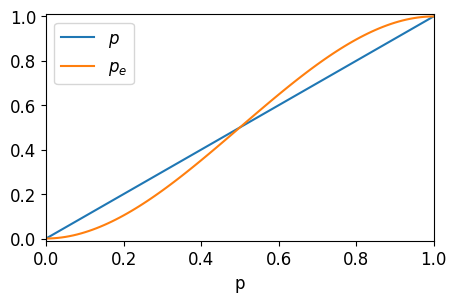

In [53]:
%run init.ipynb
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (5,3), dpi = 100)
p = np.arange(0,1.01,0.01)
plt.plot(p, p, label = r'$p$'); plt.plot(p, 3*p**2-2*p**3, label = r'$p_{e}$')
plt.xlim(0,1); plt.ylim(-0.01,1.01); plt.legend(); plt.xlabel('p'); plt.show()

# Correção de erros quânticos
Códigos de correção de erros quânticos são fundamentalmente diferentes dos códigos clássicos, por várias razões. Primeiramente, o teorema da __não clonagem__ impede que se faça cópias de estados quaisquer não conhecidos. Ou seja, se o estado do qubit é $|\psi\rangle$, em geral
$$\nexists\ U \ |\ U|\psi\rangle|\alpha\rangle=|\psi\rangle|\psi\rangle\ \forall |\psi\rangle,$$
em que $|\alpha\rangle$ é um estado inicial do sistema auxiliar. Além disso, erros quânticos são __contínuos__, mais que discretos, e podem levar e.g. o estado $|0\rangle$ e uma superposição qualquer $c_{0}|0\rangle + c_{1}|1\rangle$, ou, de forma mais geral, a um operador densidade $\rho$ qualquer:
$$|\psi\rangle\rightarrow\text{ erro }\rightarrow \rho=(I+xX+yY+zZ)/2 \text{ com }x,y,z\in\mathbb{R}\ |\ \rho\ge\mathbb{O}.$$
Outra diferença fundamental é que __não podemos medir__ um qubit, para obter informação sobre seu estado, sem perturbá-lo. Isso por causa do colapso da função de onda:
$$|\psi\rangle\rightarrow \text{ mede } O \rightarrow \text{ estado colapsa para } |o_{1}\rangle, |o_{2}\rangle, \cdots.$$

##  Erro de inversão de bit quântico
### Codificação
Afortunadamente, esse _emaranhamento_ entre qubit e ambiente, que causa os erros quânticos, pode ser combatido usando emaranhamento. Vamos começar nossa análise de correção de erros quânticos considerando o erro de inversão de bit. Nesse caso a operação de inversão de bit, a porta $X$, é aplicada com probabilidade $p$. E não acontece nada com o qubit com probabilidade $1-p$, para $p\in[0,1]$. Ou seja,
$$\rho \rightarrow \text{ erro de inversão de bit }\rightarrow (1-p)\rho +pX\rho X = \Lambda_{bf}(\rho).$$

Para corrigir esses erros, começamos fazendo a seguinte codificação com 3 qubits:
$$|\psi\rangle = c_{0}|0\rangle+c_{1}|1\rangle \longrightarrow c_{0}|000\rangle+c_{1}|111\rangle =: c_{0}|0_{L}\rangle+c_{1}|1_{L}\rangle = |\Psi\rangle,$$
em que $|j_{L}\rangle$ é chamado de qubit lógico. Esse estado codificado por ser preparado usando duas NOT controladas:
\begin{align}
|\Psi\rangle & = C_{x}^{12}C_{x}^{01}|\psi\rangle|0\rangle|0\rangle \\
& = C_{x}^{12}C_{x}^{01}(c_{0}|000\rangle+c_{1}|100\rangle) \\
& = C_{x}^{12}(c_{0}|000\rangle+c_{1}|110\rangle) \\
& = c_{0}|000\rangle+c_{1}|111\rangle.
\end{align}
Veja o circuito abaixo.

OBS: Assim como no caso clássico, podemos melhorar nosso protocolo de correção de erros usando mais redundância, ou seja, usando mais bits no caso clássico e emaranhando mais qubits no caso quântico.

__Exercício:__ Verifique que $|\Psi\rangle = C_{x}^{01}C_{x}^{02}|\psi\rangle|0\rangle|0\rangle$.

In [54]:
from qiskit import *

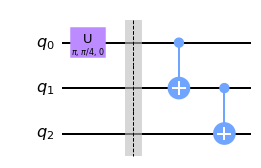

In [55]:
def qc_coding_bf(th, ph):
    qc = QuantumCircuit(3, name = 'Coding BF')
    qc.u(th, ph, 0, 0)
    qc.barrier()
    qc.cx(0,1); qc.cx(1,2)
    return qc
qc_coding_bf_ = qc_coding_bf(math.pi, math.pi/4); qc_coding_bf_.draw(output = 'mpl')

### Detecção de erros (diagnóstico de síndrome)
Pode-se perceber que os possíveis erros em um único qubit podem ser identificados usando medidas de observáveis globais que possuem os seguintes projetores construídos a partir de seus autovetores:
\begin{align}
& P_{0} = |000\rangle\langle 000| + |111\rangle\langle 111| \text{, nenhum erro}; \\
& P_{1} = |100\rangle\langle 100| + |011\rangle\langle 011| \text{, BF no 1º qubit}; \\
& P_{2} = |010\rangle\langle 010| + |101\rangle\langle 101| \text{, BF no 2º qubit}; \\
& P_{3} = |001\rangle\langle 001| + |110\rangle\langle 110| \text{, BF no 3º qubit}.
\end{align}

Se nenhum erro ocorreu, então
\begin{align}
Pr(P_{0}|\Psi) & = Tr(|\Psi\rangle\langle\Psi|P_{0}) = \langle\Psi|P_{0}|\Psi\rangle \\
& = (c_{0}^{*}\langle 000|+c_{1}^{*}\langle 111|)(|000\rangle\langle 000| + |111\rangle\langle 111|)(c_{0}|000\rangle+c_{1}|111\rangle) \\
& = |c_{0}|^{2} + |c_{1}|^{2} = 1,
\end{align}
e $Pr(P_{1})=Pr(P_{2})=Pr(P_{3})=0$.

Se a inversão de bit ocorreu no 1º qubit, i.e., 
$$|\Psi\rangle\rightarrow |\Psi'\rangle=c_{0}|100\rangle+c_{1}|011\rangle,$$
então
\begin{align}
Pr(P_{1}|\Psi') & = Tr(|\Psi'\rangle\langle\Psi'|P_{1}) = \langle\Psi'|P_{1}|\Psi'\rangle \\
& = (c_{0}^{*}\langle 100|+c_{1}^{*}\langle 011|)(|100\rangle\langle 100| + |011\rangle\langle 011|)(c_{0}|100\rangle+c_{1}|011\rangle) \\
& = |c_{0}|^{2} + |c_{1}|^{2} = 1,
\end{align}
e $Pr(P_{0})=Pr(P_{2})=Pr(P_{3})=0$.

__Exercício:__ Verifique que se a inversão de bit ocorreu no 2º qubit, i.e., $|\Psi\rangle\rightarrow |\Psi''\rangle=c_{0}|010\rangle+c_{1}|101\rangle$, então  $Pr(P_{2}|\Psi'') =1$. Verifique também que se a inversão de bit ocorreu no 3º qubit, i.e., $|\Psi\rangle\rightarrow |\Psi'''\rangle=c_{0}|001\rangle+c_{1}|110\rangle$, então  $Pr(P_{3}|\Psi''') =1$.

Uma observação importante aqui é que a medida de síndrome não perturba o estado do sistema, pois só nos informa qual erro ocorreu, não fornecendo nenhuma informação sobre o estado do sistema (i.e., sobre $c_{0}$ e $c_{1}$). Isso vale tanto para medida seletiva quanto para medida não seletiva.

### Recuperação do estado (correção do erro)
Uma vez identificado o erro que ocorreu, para recuperar o estado original, aplicamos $X$ no qubit correspondente:
\begin{align}
& \text{Resultado} \ \therefore\  \text{Operação}\\
& P_{0} \ \therefore\ I\otimes I\otimes I, \\
& P_{1} \ \therefore\ X\otimes I\otimes I, \\
& P_{2} \ \therefore\ I\otimes X\otimes I, \\
& P_{3} \ \therefore\ I\otimes I\otimes X.
\end{align}
Por exemplo, se a inversão ocorreu no 3º qubit, obteremos $P_{3}$ e aplicamos
\begin{align}
I\otimes I\otimes X|\Psi'''\rangle & = c_{0}I\otimes I\otimes X|001\rangle + c_{1}I\otimes I\otimes X|110\rangle \\
& = c_{0}|000\rangle + c_{1}|111\rangle = |\Psi\rangle.
\end{align}

Sobre a implementação de fato dos projetores $\{P_{j}\}_{j=0}^{3}$, começamos notando que para medidas do observável $Z$ dos dois primeiros qubits, teremos que
\begin{align}
Z_{0}Z_{1} & \equiv Z\otimes Z\otimes I \\
& = (|0\rangle\langle 0|-|1\rangle\langle 1|)\otimes(|0\rangle\langle 0|-|1\rangle\langle 1|)\otimes I \\
& = \big((+1)(|00\rangle\langle 00|+|11\rangle\langle 11|) + (-1)(|01\rangle\langle 01|+|10\rangle\langle 10|)\big)\otimes I.
\end{align}
Ou seja, se ao medir $Z_{0}Z_{1}$ obtemos $+1$, descobrimos que os qubits 0 e 1 possuem o mesmo valor. Se obtemos $-1$, descobrimos que esses qubits possuem valores diferentes.

O análogo segue para medidas de $Z$ dos dois últimos qubits:
\begin{align}
Z_{1}Z_{2} & \equiv I\otimes Z\otimes Z \\
& = I\otimes (|0\rangle\langle 0|-|1\rangle\langle 1|)\otimes(|0\rangle\langle 0|-|1\rangle\langle 1|) \\
& = I\otimes \big((+1)(|00\rangle\langle 00|+|11\rangle\langle 11|) + (-1)(|01\rangle\langle 01|+|10\rangle\langle 10|)\big).
\end{align}
Ou seja, se ao medir $Z_{1}Z_{2}$ obtemos $+1$, descobrimos que os qubits 1 e 2 possuem o mesmo valor. Se obtemos $-1$, descobrimos que esses qubits possuem valores diferentes.

Por conseguinte, medindo $Z_{0}Z_{1}$ e $Z_{1}Z_{2}$ em sequência descobrimos se e qual errou ocorreu, e assim podemos corrigí-lo. Por exemplo, se a inversão de bit ocorreu no 2º qubit, $|\Psi\rangle\rightarrow|\Psi''\rangle=c_{0}|010\rangle+c_{1}|101\rangle$, ao medir $Z_{0}Z_{1}$ descobriremos que os qubits 0 e 1 possuem valores diferentes  e ao medir $Z_{1}Z_{2}$ descobriremos que os qubits 1 e 2 também possuem valores diferentes. Note que em nenhum momento descobrimos qual é o valor, somente temos acesso a se os valores são iguais ou diferentes. Nesse exemplo, como o 2º qubit tem valor diferente do 1º e do 3º, o erro ocorreu nele. Aplicando $X$ no 2º qubit, corrigimos esse erro.

OBS: No IBMQ, o que temos disponível são medidas de $Z$ individuais para cada qubit. O nosso desafio na sequência é entender como implementar medidas que informam somente a paridade dos qubits, e não seu valor (para que não ocorra o colapso da função de onda).

Seguindo, vamos verificar que uma medida do observável $Z_{0}Z_{1}=Z\otimes Z\otimes I$ seguinda de uma medida de $Z_{1}Z_{2}=I\otimes Z\otimes Z$ corresponde de fato a uma medida projetiva com os projetores $\{P_{0},P_{1},P_{2},P_{3}\}$. Consideremos que o estado antes da medida é $|\tilde{\Psi}\rangle$. Ao medir $Z_{0}Z_{1}$, dependendo do resultado obtido, teremos os seguintes estados pós-medida:
\begin{align}
+1 \ \therefore\ |\tilde{\Psi}\rangle\rightarrow |\tilde{\Psi}_{+1}\rangle \propto \big((|00\rangle\langle 00|+|11\rangle\langle 11|)\otimes I\big)|\tilde{\Psi}\rangle, \\
-1 \ \therefore |\tilde{\Psi}\rangle\rightarrow |\tilde{\Psi}_{-1}\rangle \propto \big((|01\rangle\langle 01|+|10\rangle\langle 10|)\otimes I\big)|\tilde{\Psi}\rangle
\end{align}

Seguindo, para o estado pós-medida $|\tilde{\Psi}_{+1}\rangle$, se medimos $Z_{1}Z_{2}$, teremos os seguintes estados pós-medida:
\begin{align}
& +1\ \therefore\ |\tilde{\Psi}_{+1}\rangle\rightarrow \\
& |\tilde{\Psi}_{+1,+1}\rangle \propto \big(I\otimes(|00\rangle\langle 00|+|11\rangle\langle 11|)\big)|\tilde{\Psi}_{+1}\rangle \\
& = \big(I\otimes(|00\rangle\langle 00|+|11\rangle\langle 11|)\big)\big((|00\rangle\langle 00|+|11\rangle\langle 11|)\otimes I\big)|\tilde{\Psi}\rangle \\
& = \big(I\otimes|0\rangle\langle 0|\otimes|0\rangle\langle 0|+I\otimes|1\rangle\langle 1|\otimes|1\rangle\langle 1|\big)\big(|0\rangle\langle 0|\otimes|0\rangle\langle 0|\otimes I+|1\rangle\langle 1|\otimes|1\rangle\langle 1|\otimes I\big)|\tilde{\Psi}\rangle \\
& = \big(|0\rangle\langle 0|\otimes|0\rangle\langle 0|\otimes|0\rangle\langle 0| + 0 + 0 +|1\rangle\langle 1|\otimes|1\rangle\langle 1|\otimes|1\rangle\langle 1|\big)|\tilde{\Psi}\rangle \\
& = \big(|000\rangle\langle 000|+|111\rangle\langle 111|\big)|\tilde{\Psi}\rangle \\
& = P_{0}|\tilde{\Psi}\rangle.
\end{align}

__Exercício:__ De forma análoga, verifique que 
$$|\tilde{\Psi}_{+1,-1}\rangle \propto P_{3}|\tilde{\Psi}\rangle.$$

Para o estado pós-medida $|\tilde{\Psi}_{-1}\rangle$, se medimos $Z_{1}Z_{2}$, teremos os seguintes estados pós-medida:
\begin{align}
& +1\ \therefore\ |\tilde{\Psi}_{-1}\rangle\rightarrow \\
& |\tilde{\Psi}_{-1,+1}\rangle \propto \big(I\otimes(|00\rangle\langle 00|+|11\rangle\langle 11|)\big)|\tilde{\Psi}_{-1}\rangle \\
& = \big(I\otimes(|00\rangle\langle 00|+|11\rangle\langle 11|)\big)\big((|01\rangle\langle 01|+|10\rangle\langle 10|)\otimes I\big)|\tilde{\Psi}\rangle \\
& = \big(I\otimes|0\rangle\langle 0|\otimes|0\rangle\langle 0|+I\otimes|1\rangle\langle 1|\otimes|1\rangle\langle 1|\big)\big(|0\rangle\langle 0|\otimes|1\rangle\langle 1|\otimes I+|1\rangle\langle 1|\otimes|0\rangle\langle 0|\otimes I\big)|\tilde{\Psi}\rangle \\
& = \big(0 + |1\rangle\langle 1|\otimes|0\rangle\langle 0|\otimes|0\rangle\langle 0| +|0\rangle\langle 0|\otimes|1\rangle\langle 1|\otimes|1\rangle\langle 1| + 0\big)|\tilde{\Psi}\rangle \\
& = \big(|100\rangle\langle 100|+|011\rangle\langle 011|\big)|\tilde{\Psi}\rangle \\
& = P_{1}|\tilde{\Psi}\rangle.
\end{align}

__Exercício:__ De forma análoga, verifique que 
$$|\tilde{\Psi}_{-1,-1}\rangle \propto P_{2}|\tilde{\Psi}\rangle.$$

## Medidas de paridade
Considere o circuito abaixo.

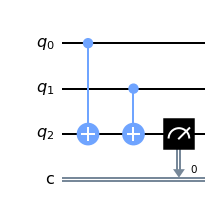

In [61]:
qc = QuantumCircuit(3, 1); qc.cx([0], [2]); qc.cx([1], [2]); qc.measure([2], 0); qc.draw(output = 'mpl')

Sabemos que a CNOT copia os estados da base computacional para o qubit auxiliar. Com isso, esse circuito quântico nos levará aos estados
\begin{align}
& |00\rangle|0\rangle \xrightarrow[]{C_{x}^{02}}  |00\rangle|0\rangle \xrightarrow[]{C_{x}^{12}}  |00\rangle|0\rangle, \\
& |01\rangle|0\rangle \xrightarrow[]{C_{x}^{02}}  |01\rangle|0\rangle \xrightarrow[]{C_{x}^{12}}  |01\rangle|1\rangle, \\
& |10\rangle|0\rangle \xrightarrow[]{C_{x}^{02}}  |10\rangle|1\rangle \xrightarrow[]{C_{x}^{12}}  |10\rangle|1\rangle, \\
& |11\rangle|0\rangle \xrightarrow[]{C_{x}^{02}}  |11\rangle|1\rangle \xrightarrow[]{C_{x}^{12}}  |11\rangle|0\rangle.
\end{align}
Ou seja, se o estado dos qubits 0 e 1 tem paridade par, o estado final do qubit auxiliar 2 é $|0\rangle$, se o estado dos qubits 0 e 1 tem paridade ímpar, o estado final do qubit auxiliar 2 é $|1\rangle$.

Agora, uma vez que foi feita a codificação no protocolo de correção de erros, ou seja, uma vez que preparamos o estado $c_{0}|000\rangle+c_{1}|111\rangle$, podemos fazer as medidas de paridade, ou medidas de síndrome, conforme o circuito abaixo.

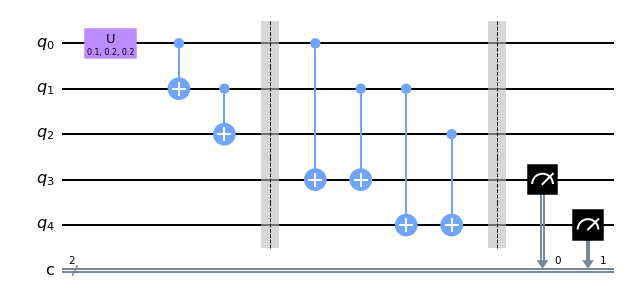

In [63]:
qc = QuantumCircuit(5, 2); qc.u(0.1, 0.2, 0.2, [0]); qc.cx([0], [1]); qc.cx([1], [2]); qc.barrier()
qc.cx([0], [3]); qc.cx([1], [3]); qc.cx([1], [4]); qc.cx([2], [4]); qc.barrier(); qc.measure([3, 4], [0, 1])
qc.draw(output = 'mpl')

Esse circuito implementa as medidas de paridade que precisamos no protocolo de correção de erros. Se obtemos $|0\rangle$ na medida no qubit 3, sabemos que o estado dos qubits 0 e 1 tem paridade par, se obtemos $|1\rangle$ a paridade é ímpar. Analogamente, se obtemos $|0\rangle$ na medida do qubit 4, sabemos que a paridade dos qubits 1 e 2 é par, e que é ímpar se obtemos $|1\rangle$.

Relacionado aos erros de inversão de bit, se ocorre um erro no qubit 0, temos o estado $c_{0}|100\rangle+c_{1}|011\rangle$, e assim os qubits 0 e 1 tem paridade diferente enquanto que os qubits 1 e 2 tem a mesma paridade. Com isso, ao medir os qubits 3 e 4 obteremos os estado
$$X_{0} \ \rightarrow\ c_{0}|100\rangle+c_{1}|011\rangle \ \rightarrow\ |1\rangle_{3}|0\rangle_{4}.$$
Analogamente, se o erro ocorreu no qubit 1, teremos
$$X_{1} \ \rightarrow\ c_{0}|010\rangle+c_{1}|101\rangle \ \rightarrow\ |1\rangle_{3}|1\rangle_{4}.$$
Por fim, se o erro ocorreu no qubit e, teremos
$$X_{2} \ \rightarrow\ c_{0}|001\rangle+c_{1}|110\rangle \ \rightarrow\ |0\rangle_{3}|1\rangle_{4}.$$
Claro, se não ocorre nenhum erro, teremos
$$I_{012} \ \rightarrow\ c_{0}|000\rangle+c_{1}|111\rangle \ \rightarrow\ |0\rangle_{3}|0\rangle_{4}.$$

Vemos assim que o estado final dos qubits 3 e 4 nos informa qual ação precisamos fazer para corrigir o erro:
\begin{align}
& |1\rangle_{3}|0\rangle_{4} \ \rightarrow\ X_{0}, \\
& |1\rangle_{3}|1\rangle_{4} \ \rightarrow\ X_{1}, \\
& |0\rangle_{3}|1\rangle_{4} \ \rightarrow\ X_{2}, \\
& |0\rangle_{3}|0\rangle_{4} \ \rightarrow\ I_{012}.
\end{align}

Podemos fazer isso usando portas duplamente controladas, com os qubits 3 e 4 como controles. Esse portas te a forma
\begin{align}
CC_{x,11}^{012} = |0\rangle\langle 0|\otimes|0\rangle\langle 0|\otimes I + |0\rangle\langle 0|\otimes|1\rangle\langle 1|\otimes I + |1\rangle\langle 1|\otimes|0\rangle\langle 0|\otimes I + |1\rangle\langle 1|\otimes|1\rangle\langle 1|\otimes X.
\end{align}
O sub-escrito 11 indica que a operação controlada $X$ é aplicada somente quando o estado conjunto do controle for $|11\rangle$. 

Não é difícil ver que
\begin{align}
& CC_{x,01}^{012} = (X\otimes I\otimes I)CC_{x,11}^{012}(X\otimes I\otimes I), \\
& CC_{x,10}^{012} = (I\otimes X\otimes I)CC_{x,11}^{012}(I\otimes X\otimes I), \\
& CC_{x,00}^{012} = (X\otimes X\otimes I)CC_{x,11}^{012}(X\otimes X\otimes I).
\end{align}

Com isto, podemos implementar de forma totalmente unitária o protocolo de correção de erro de bit flip, como mostrado abaixo.

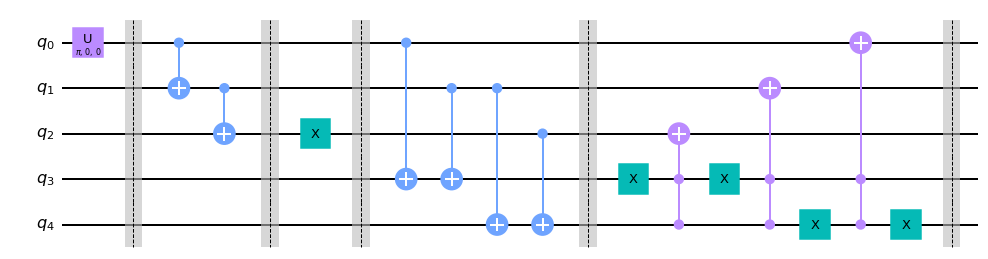

In [92]:
def qc_ec_bf(th, ph, lb, j):
    qc = QuantumCircuit(5, name = 'EC_BF')
    qc.u(th, ph, lb, [0]) # qubit state preparation
    qc.barrier()
    qc.cx([0], [1]); qc.cx([1], [2]) # encoding
    qc.barrier()
    if j == 0 or j == 1 or j == 2:  # error
        qc.x([j])
    qc.barrier() 
    qc.cx([0], [3]); qc.cx([1], [3]); qc.cx([1], [4]); qc.cx([2], [4]) # syndrome detection
    qc.barrier()
    qc.x([3]); qc.ccx([4], [3], [2]); qc.x([3]); qc.ccx([4], [3], [1]) # correction
    qc.x([4]); qc.ccx([4], [3], [0]); qc.x([4]) # correction
    qc.barrier()
    return qc
th, ph, lb = math.pi, 0.0, 0.0; j = 2; qc_ec_bf_ = qc_ec_bf(th, ph, lb, j)
qc_ec_bf_.draw(output = 'mpl')

Vamos para as contas. Assumimos que o erro ocorreu no qubit 0:
\begin{align}
& |\psi\rangle|0000\rangle \xrightarrow[]{C_{x}^{01}C_{x}^{12}} \big(c_{0}|000\rangle + c_{1}|111\rangle\big)|00\rangle \xrightarrow[]{X_{0}} \big(c_{0}|100\rangle + c_{1}|011\rangle\big)|00\rangle \\
& \xrightarrow[]{C_{x}^{03}} \big(c_{0}|1001\rangle + c_{1}|0110\rangle\big)|0\rangle \xrightarrow[]{C_{x}^{13}} \big(c_{0}|1001\rangle + c_{1}|0111\rangle\big)|0\rangle \\
& \xrightarrow[]{C_{x}^{14}} \big(c_{0}|10010\rangle + c_{1}|01111\rangle\big) \xrightarrow[]{C_{x}^{24}} \big(c_{0}|10010\rangle + c_{1}|01110\rangle\big) \\
&  \xrightarrow[]{X_{3}} \big(c_{0}|10000\rangle + c_{1}|01100\rangle\big) \xrightarrow[]{CC_{x}^{432}} \big(c_{0}|10000\rangle + c_{1}|01100\rangle\big) \\
&  \xrightarrow[]{X_{3}} \big(c_{0}|10010\rangle + c_{1}|01110\rangle\big)  \xrightarrow[]{CC_{x}^{431}} \big(c_{0}|10010\rangle + c_{1}|01110\rangle\big) \\
&   \xrightarrow[]{X_{4}} \big(c_{0}|10011\rangle + c_{1}|01111\rangle\big)   \xrightarrow[]{CC_{x}^{430}} \big(c_{0}|00011\rangle + c_{1}|11111\rangle\big)  \\
&  \xrightarrow[]{X_{4}} \big(c_{0}|00010\rangle + c_{1}|11110\rangle\big) = \big(c_{0}|000\rangle + c_{1}|111\rangle\big)|10\rangle.
\end{align}

##### Exercício
Faça as contas para um bit flip no qubit 1.

__OBS:__ Tem muitas questões que temos que ver aqui. Por exemplo, se o erro ocorrer em outro momento durante a execução do circuito, esse protocolo ainda funciona? E se ocorre um erro nos qubits auxiliares para medida de paridade?

In [3]:
from qiskit import *
nshots = 8192
qiskit.IBMQ.load_account()
#provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')
#device = provider.get_backend('ibmq_jakarta')
provider = qiskit.IBMQ.get_provider(hub = 'ibm-q-research-2', group = 'federal-uni-sant-1', project = 'main')
device = provider.get_backend('ibmq_bogota')
simulator = Aer.get_backend('qasm_simulator')
from qiskit.tools.monitor import job_monitor
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.tools.monitor import backend_overview, backend_monitor
from qiskit.tools.visualization import plot_histogram

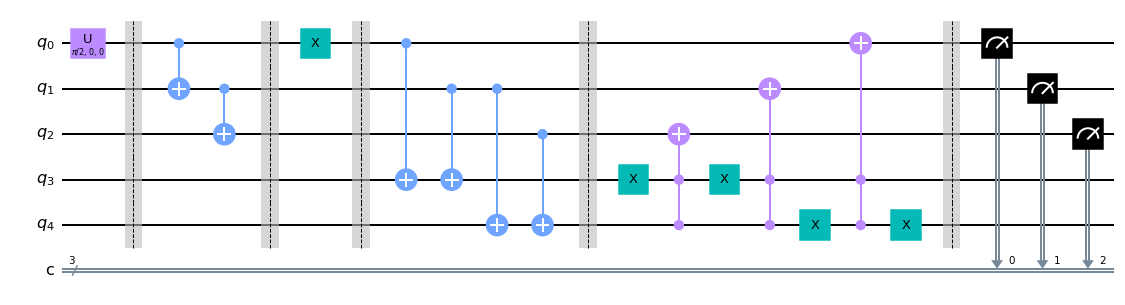

In [97]:
qc = QuantumCircuit(5, 3); 
j = 0 # sets the error
qc_ec_bf_ = qc_ec_bf(math.pi/2, 0.0, 0.0, j); qc.append(qc_ec_bf_, [0, 1, 2, 3, 4])
qc.measure([0, 1, 2], [0, 1, 2])
qc.decompose().draw(output = 'mpl')

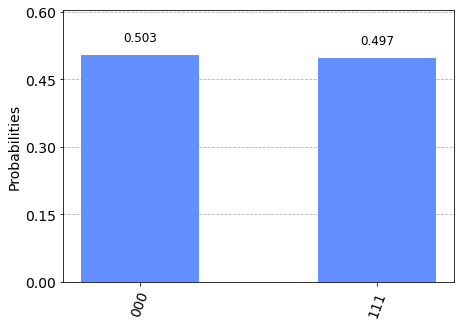

In [98]:
job_sim = execute(qc, backend = simulator, shots = nshots).result()
plot_histogram(job_sim.get_counts(qc))

61f194c5404aae32de43aa5e
Job Status: job has successfully run


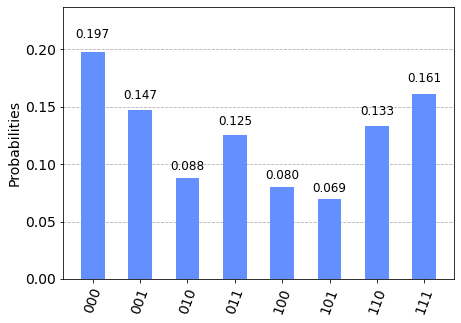

In [99]:
job_exp = execute(qc, backend = device, shots = nshots)
print(job_exp.job_id()); job_monitor(job_exp)
plot_histogram(job_exp.result().get_counts(qc))

Vemos assim que o grande número de SWAPs e CNOTs necessárias para implementação do circuito de correção de erros fazem com o estado preparado seja muito diferente do estado que queríamos preparar.

##### Exercício
Execute esses códigos para quando o erro ocorre em um dos outros qubits 0, 1 ou 2.

## Sobre medidas de observáveis usando sistemas auxiliares
No final do dia, não ajudou com relação ao entendomento do protocolo de correção de erros.
#### Medida de $Z$
Considere o circuito quântico abaixo. A porta $U$ é inserida somente para preparação do estado $|\psi\rangle$.

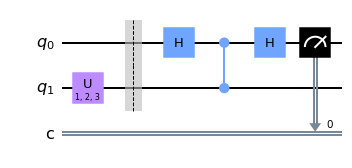

In [10]:
qc = QuantumCircuit(2, 1)
qc.u(1,2,3, [1])
qc.barrier()
qc.h([0]); qc.cz(0, 1); qc.h([0]); 
qc.measure(0,0); qc.draw(output = 'mpl')

Se começamos com o estado 
$$|\psi_{0}\rangle = |0\rangle|\psi\rangle.$$
Assim
\begin{align}
|\psi_{1}\rangle & = (H\otimes I)|\psi_{0}\rangle = |+\rangle|\psi\rangle, \\
|\psi_{2}\rangle & = C_{z}|\psi_{1}\rangle = C_{z}\frac{1}{\sqrt{2}}\big(|0\rangle+|1\rangle\big)\big(c_{0}|0\rangle+c_{1}|1\rangle\big) \\
& = \frac{1}{\sqrt{2}}\big(c_{0}C_{z}|00\rangle+c_{0}C_{z}|10\rangle+c_{1}C_{z}|01\rangle+c_{1}C_{z}|11\rangle\big) \\
& = \frac{1}{\sqrt{2}}\big(c_{0}|00\rangle+c_{0}|10\rangle+c_{1}|01\rangle-c_{1}|11\rangle\big), \\
|\psi_{3}\rangle & = (H\otimes I)|\psi_{2}\rangle = \frac{1}{\sqrt{2}}\big(c_{0}|+0\rangle+c_{0}|-0\rangle+c_{1}|+1\rangle-c_{1}|-1\rangle\big) \\
&  = \frac{1}{\sqrt{2}}\big(c_{0}(|+\rangle+|-\rangle)|0\rangle + c_{1}(|+\rangle-|-\rangle)|1\rangle\big) = \frac{1}{\sqrt{2}}\Big(c_{0}\frac{2}{\sqrt{2}}|0\rangle|0\rangle + c_{1}\frac{2}{\sqrt{2}}|1\rangle|1\rangle\Big) \\
& = c_{0}|00\rangle + c_{1}|11\rangle.
\end{align}
Vemos com isso que esse circuito quântico implementa a medida (colapso) de $Z$ do 2º qubit através de medidas de $Z$ no 1º qubit.

OBS: Embora possamos obter a estatística do qubit 1 medindo o qubit 0, vale observar que em geral o circuito acima modifica o estado do qubit 1, de $c_{0}|0\rangle+c_{1}|1\rangle$ para $\rho = |c_{0}|^{2}|0\rangle\langle 0| + |c_{1}|^{2}|1\rangle\langle 1|$.

##### Exercício
Verifique que a medida de $Z$ pode ser implementada também usando o circuito abaixo.

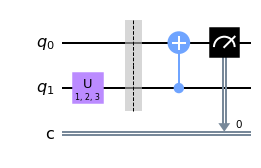

In [12]:
qc = QuantumCircuit(2, 1); 
qc.u(1,2,3, 1); 
qc.barrier()
qc.cx(1,0); qc.measure(0,0); qc.draw(output = 'mpl')

#### Medida de $X$
Para medidas de $X$, é conveniente escrever
\begin{align}
|\psi\rangle & = c_{0}|0\rangle + c_{1}|1\rangle =  c_{0}\frac{1}{\sqrt{2}}(|+\rangle+|-\rangle) + c_{1}\frac{1}{\sqrt{2}}(|+\rangle-|-\rangle) \\
& = \frac{c_{0}+c_{1}}{\sqrt{2}}|+\rangle + \frac{c_{0}-c_{1}}{\sqrt{2}}|-\rangle.
\end{align}
Agora, consideremos o circuito quântico abaixo. 

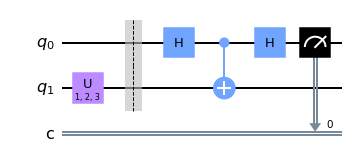

In [13]:
qc = QuantumCircuit(2, 1); 
qc.u(1,2,3, 1)
qc.barrier()
qc.h(0); qc.cx(0,1); qc.h(0); qc.measure(0,0); 
qc.draw(output = 'mpl')

Neste caso, teremos que
\begin{align}
|\psi_{1}\rangle & = (H\otimes I)|\psi_{0}\rangle = (H\otimes I)(|0\rangle\otimes|\psi\rangle) = |+\rangle|\psi\rangle, \\
|\psi_{2}\rangle & = C_{x}^{01}|\psi_{1}\rangle = C_{x}^{01}\frac{1}{\sqrt{2}}\big(|0\rangle+|1\rangle\big)\big(c_{0}|0\rangle+c_{1}|1\rangle\big) \\
& = \frac{1}{\sqrt{2}}\big(c_{0}C_{x}^{01}|00\rangle+c_{0}C_{x}^{01}|10\rangle+c_{1}C_{x}^{01}|01\rangle+c_{1}C_{x}^{01}|11\rangle\big) \\
& = \frac{1}{\sqrt{2}}\big(c_{0}|00\rangle+c_{0}|11\rangle+c_{1}|01\rangle+c_{1}|10\rangle\big), \\
|\psi_{3}\rangle & = (H\otimes I)|\psi_{2}\rangle = \frac{1}{\sqrt{2}}\big(c_{0}|+0\rangle+c_{0}|-1\rangle+c_{1}|+1\rangle+c_{1}|-0\rangle\big) \\
& = \frac{1}{2}\big(c_{0}(|0\rangle+|1\rangle)|0\rangle+c_{0}(|0\rangle-|1\rangle)|1\rangle+c_{1}(|0\rangle+|1\rangle)|1\rangle+c_{1}(|0\rangle-|1\rangle)|0\rangle\big) \\
& = \frac{1}{2}\big(c_{0}(|00\rangle+|10\rangle) + c_{0}(|01\rangle-|11\rangle) + c_{1}(|01\rangle+|11\rangle)+c_{1}(|00\rangle-|10\rangle)\big) \\
& = \frac{1}{2}\big( c_{0}|0\rangle(|0\rangle+|1\rangle) + c_{0}|1\rangle(|0\rangle-|1\rangle) + c_{1}|0\rangle(|1\rangle+|0\rangle) + c_{1}|1\rangle(|1\rangle-|0\rangle)\big) \\
& = \frac{1}{\sqrt{2}}\big( (c_{0}+c_{1})|0\rangle|+\rangle + (c_{0}-c_{1})|1\rangle|-\rangle.
\end{align}
Vemos com isso que esse circuito quântico implementa a medida (colapso) de $X$ do 2º qubit através de medidas de $Z$ no 1º qubit.

__Exercício:__ Verifique que a medida de $X$ pode ser implementada também usando o circuito abaixo.

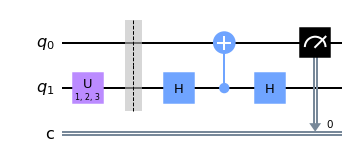

In [14]:
qc = QuantumCircuit(2, 1); 
qc.u(1,2,3, [1]); 
qc.barrier()
qc.h(1); qc.cx(1,0); qc.h(1); qc.measure(0,0); 
qc.draw(output = 'mpl')

#### Medida de $\hat{n}\cdot\vec{\sigma}$
Um observável qualquer de um qubit pode ser escrito como (__Exercício:__ Verifique)
\begin{align}
\hat{n}\cdot\vec{\sigma} & = \big(\sin\theta\sin\phi,\sin\theta\cos\phi,\cos\theta\big)\cdot(X,Y,Z) \\
& = X\sin\theta\sin\phi + Y\sin\theta\cos\phi + Z\cos\theta 
= \begin{bmatrix}
\cos\theta & e^{-i\phi}\sin\theta \\
e^{i\phi}\sin\theta & -\cos\theta \\
\end{bmatrix} \\
& = U(2\theta,\phi,\pi-\phi).
\end{align}
$\hat{n}\cdot\vec{\sigma}$ tem autovalores $\pm 1$ com autovetores correspondentes:
\begin{cases}
|n_{+}\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle, \\
|n_{-}\rangle = e^{-i\phi}\sin(\theta/2)|0\rangle - \cos(\theta/2)|1\rangle.
\end{cases}

__Exercício:__ Verifique que
\begin{cases}
|0\rangle = \cos(\theta/2)|n_{+}\rangle + e^{i\phi}\sin(\theta/2)|n_{-}\rangle, \\
|1\rangle = e^{-i\phi}\sin(\theta/2)|n_{+}\rangle - \cos(\theta/2)|n_{-}\rangle.
\end{cases}


Começamos notando que
\begin{align}
|\psi\rangle & = c_{0}|0\rangle + c_{1}|1\rangle \\
& = c_{0}\big(\cos(\theta/2)|n_{+}\rangle + e^{i\phi}\sin(\theta/2)|n_{-}\rangle\big) + c_{1}\big(e^{-i\phi}\sin(\theta/2)|n_{+}\rangle - \cos(\theta/2)|n_{-}\rangle\big) \\
& = \big(c_{0}\cos(\theta/2)+c_{1}e^{-i\phi}\sin(\theta/2)\big)|n_{+}\rangle + \big(c_{0}e^{i\phi}\sin(\theta/2)-c_{1}\cos(\theta/2)\big)|n_{-}\rangle.
\end{align}

Consideremos o circuito quântico abaixo.

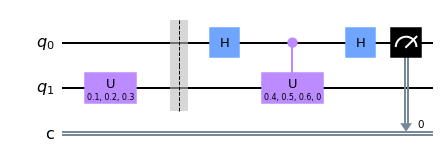

In [15]:
qc = QuantumCircuit(2, 1); 
qc.u(0.1, 0.2, 0.3, [1])
qc.barrier()
qc.h(0); qc.cu(0.4, 0.5, 0.6, 0.0, [0], [1]); qc.h([0]); qc.measure([0], [0])
qc.draw(output = 'mpl')

Começamos com $|\psi_{0}\rangle=|0\rangle|\psi\rangle$ e 
\begin{align}
|\psi_{1}\rangle & = (H\otimes I)|\psi_{0}\rangle = |+\rangle|\psi\rangle \\
& = \frac{1}{\sqrt{2}}\big(c_{0}|00\rangle + c_{0}|10\rangle + c_{1}|01\rangle + c_{1}|11\rangle \big).
\end{align}
Seguindo, usamos (__Exercício:__ Verifique) 
\begin{align}
& \hat{n}\cdot\vec{\sigma}|0\rangle = \cos\theta|0\rangle + e^{i\phi}\sin\theta|1\rangle, \\
& \hat{n}\cdot\vec{\sigma}|1\rangle = e^{-i\phi}\sin\theta|0\rangle - \cos\theta|1\rangle,
\end{align}
e aplicamos a porta controlada
\begin{align}
|\psi_{2}\rangle & = C_{\hat{n}\cdot\vec{\sigma}}^{01}|\psi_{1}\rangle \\
& = \frac{1}{\sqrt{2}}\big(c_{0}|0\rangle|0\rangle + c_{0}|1\rangle\hat{n}\cdot\vec{\sigma}|0\rangle + c_{1}|0\rangle|1\rangle + c_{1}|1\rangle\hat{n}\cdot\vec{\sigma}|1\rangle \big) \\
& = \frac{1}{\sqrt{2}}\big(c_{0}|0\rangle|0\rangle + c_{0}|1\rangle(\cos\theta|0\rangle + e^{i\phi}\sin\theta|1\rangle) + c_{1}|0\rangle|1\rangle + c_{1}|1\rangle(e^{-i\phi}\sin\theta|0\rangle - \cos\theta|1\rangle) \big) \\
& = \frac{1}{\sqrt{2}}\Big(|0\rangle(c_{0}|0\rangle+c_{1}|1\rangle)) + |1\rangle\big(c_{0}(\cos\theta|0\rangle + e^{i\phi}\sin\theta|1\rangle)+c_{1}(e^{-i\phi}\sin\theta|0\rangle - \cos\theta|1\rangle)\big)\Big).
\end{align}

\begin{align}
|\psi_{3}\rangle & = (H\otimes I)|\psi_{3}\rangle \\
& = \frac{1}{\sqrt{2}}\Big(|+\rangle(c_{0}|0\rangle+c_{1}|1\rangle)) + |-\rangle\big(c_{0}(\cos\theta|0\rangle + e^{i\phi}\sin\theta|1\rangle)+c_{1}(e^{-i\phi}\sin\theta|0\rangle - \cos\theta|1\rangle)\big)\Big) \\
& = \frac{1}{2}\Big(|0\rangle\big(c_{0}|0\rangle+c_{1}|1\rangle+c_{0}(\cos\theta|0\rangle + e^{i\phi}\sin\theta|1\rangle)+c_{1}(e^{-i\phi}\sin\theta|0\rangle - \cos\theta|1\rangle)\big)  \Big)\\
& = \\
& = \big(c_{0}\cos(\theta/2)+c_{1}e^{-i\phi}\sin(\theta/2)\big)|0\rangle|n_{+}\rangle + \big(c_{0}e^{i\phi}\sin(\theta/2)-c_{1}\cos(\theta/2)\big)|1\rangle|n_{-}\rangle.
\end{align}

## Mitigação do erro de bit flip
Vimos que não é factível utilizar protocolos gerais de correção de erro nos chips atuais. Vejamos se conseguimos obter outras possibilidades menos gerais, mas que ainda assim possam ser utilizadas para diminuir as taxas de erro.

### Código de 2 qubits para o bit flip
Abaixo vemos que utilizando 1 qubit auxiliar, podemos corrigir erros de bit flip que ocorrem somente no qubit principal.

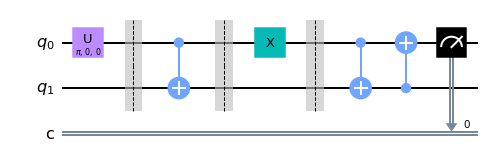

In [115]:
qc = QuantumCircuit(2, 1)
th, ph, lb = math.pi, 0.0, 0.0; qc.u(th, ph, lb, [0]) # state preparation
qc.barrier(); qc.cx([0], [1]); qc.barrier()
qc.x([0]); qc.barrier()
qc.cx([0], [1]); qc.cx([1], [0])
qc.measure([0], [0])
qc.draw(output = 'mpl')

Sequência de estados
\begin{align}
& |\psi\rangle|0\rangle \xrightarrow[]{C_{x}^{01}} c_{0}|00\rangle + c_{1}|11\rangle \\
& \xrightarrow[]{X_{0}} c_{0}|10\rangle + c_{1}|01\rangle \\
& \xrightarrow[]{C_{x}^{01}} c_{0}|11\rangle + c_{1}|01\rangle = (c_{0}|1\rangle + c_{1}|0\rangle)|1\rangle \\
& \xrightarrow[]{C_{x}^{10}} (c_{0}|0\rangle + c_{1}|1\rangle)|1\rangle = |\psi\rangle|1\rangle.
\end{align}
Ou seja, o flip foi jogado para o sistema auxiliar. 

Se não aconteceu o flip no qubit 0, como o estado inicial do sistema auxiliar, o qubit 1, é $|0\rangle$, não acontece nada com o estado do qubit 0. 

Se acontecer um flip no qubit 1, esse circuito não funciona.

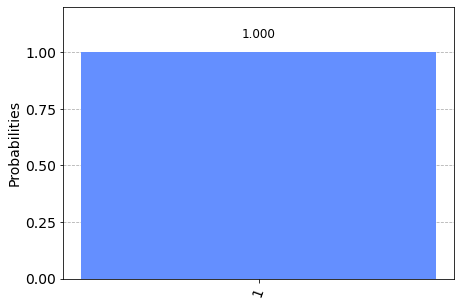

In [116]:
job = execute(qc, backend = simulator, shots = nshots)
plot_histogram(job.result().get_counts(qc))

Job Status: job has successfully run


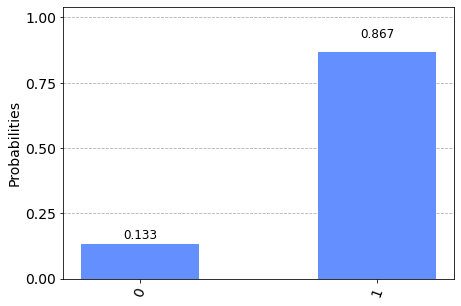

In [117]:
job = execute(qc, backend = device, shots = nshots); job_monitor(job)
plot_histogram(job.result().get_counts(qc))

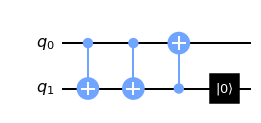

In [126]:
# quantum circuit for bit flip error mitigation
def qc_em_bf():
    qc = QuantumCircuit(2, name = 'EM_BF')
    qc.cx([0], [1]); qc.cx([0], [1]); qc.cx([1], [0]); qc.reset([1])
    return qc
qc_em_bf_ = qc_em_bf(); qc_em_bf_.draw(output = 'mpl')

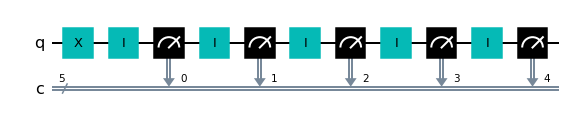

In [122]:
N = 5; qc = QuantumCircuit(1, N); qc.x([0]); 
for j in range(0, N):
    qc.id([0]); qc.measure([0],[j])
job = execute(qc, backend = simulator, shots = nshots)
qc.draw(output = 'mpl')

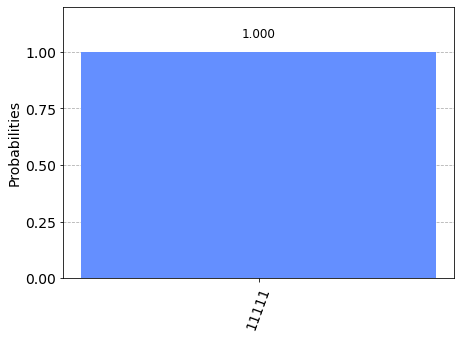

In [121]:
plot_histogram(job.result().get_counts(qc))

Job Status: job has successfully run


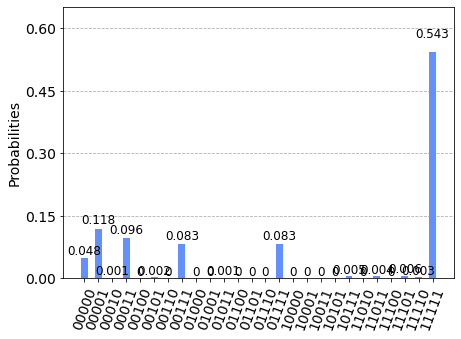

In [123]:
job = execute(qc, backend = device, shots = nshots)
job_monitor(job)
plot_histogram(job.result().get_counts(qc))

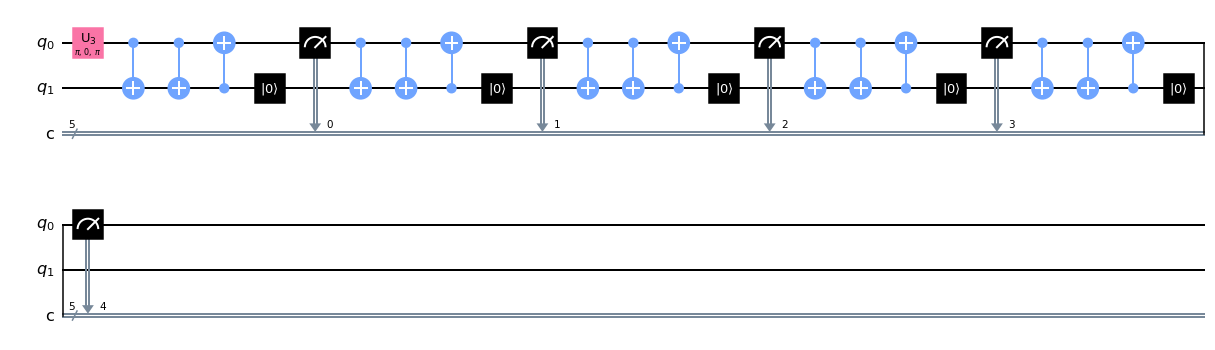

In [129]:
N = 5; qc = QuantumCircuit(2, N); qc.x([0]); 
for j in range(0, N):
    qc_em_bf_ = qc_em_bf(); qc.append(qc_em_bf_, [0, 1]); qc.measure([0],[j])
job = execute(qc, backend = simulator, shots = nshots)
qc.decompose().draw(output = 'mpl')

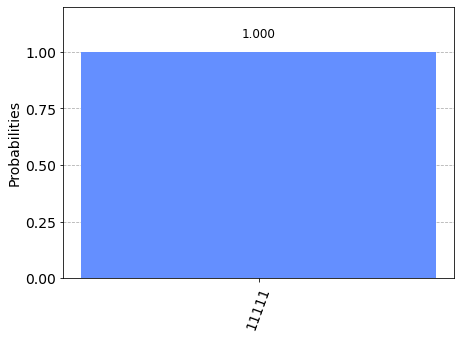

In [128]:
plot_histogram(job.result().get_counts(qc))

Job Status: job has successfully run


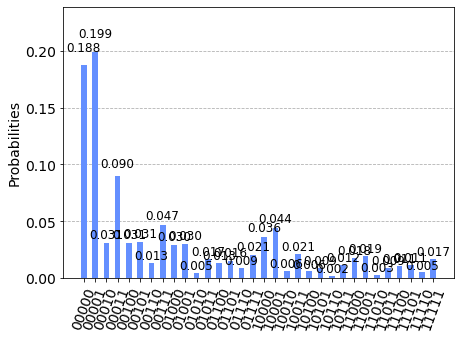

In [130]:
job = execute(qc, backend = device, shots = nshots)
job_monitor(job)
plot_histogram(job.result().get_counts(qc))

## Mitigação em meio a portas lógicas 
Vamos considerar uma situação como a do circuito abaixo.

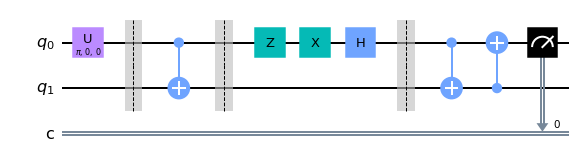

In [6]:
import math
qc = QuantumCircuit(2, 1)
th, ph, lb = math.pi, 0.0, 0.0; qc.u(th, ph, lb, [0]) # state preparation
qc.barrier(); qc.cx([0], [1]); qc.barrier()
qc.z([0]); qc.x([0]); qc.h([0]); qc.barrier()
qc.cx([0], [1]); qc.cx([1], [0]); qc.measure([0], [0])
qc.draw(output = 'mpl')

Não é difícil ver que o estado obtido sem erros e com as portas CNOT não é o mesmo que o estado obtido quando somente as portas $Z$ e $H$ estão presentes.